# 📚 Exploring Computer Vision Tasks with YOLO

## 1. Intro

- In the previous article, we discussed how **CLIP** bridges **text and images** by mapping them into a shared embedding space.
- You can read more about it here: [CLIP: How AI Connects Text and Images Without Explicit Labels](https://www.linkedin.com/pulse/clip-how-ai-connects-text-images-without-explicit-yabut-meng-ai-wg9wf)
- This allowed us to classify images based on their similarity to textual descriptions, showcasing an exciting intersection between vision and language.

### Introducing Computer Vision
- What we explored with CLIP is part of a broader field in AI called **Computer Vision (CV)**.
- Computer Vision focuses on enabling machines to **"see"** and **understand visual information** similarly to how humans do.
- While CLIP demonstrated one task (classification), CV encompasses **many more tasks** beyond simple object recognition.

### What Will We Cover in This Notebook?
- In this notebook, we will dive deeper into the world of Computer Vision.
- We'll explore the different **core tasks** that CV models can perform, aside from object classification.
- To make it practical and hands-on, we will use models from the **YOLO family** as our tool for demonstration.

### Beyond Image Classification
- Modern Computer Vision can:
  - **Object Dection**: Detect multiple objects within a single image.
  - **Segmentation**: Segment individual objects at the pixel level.
  - **Pose Estimation**: Estimate human poses and body keypoints.
  - **Oriented Bounding Box (OBB)**: Recognize and handle rotated or oriented objects.

### Why YOLO Models?
- **YOLO (You Only Look Once)** is not just a single model — it is a **family of models**.
- Different versions and variants of YOLO are capable of handling various **Computer Vision tasks**.
- The YOLO family is known for:
  - Real-time performance.
  - High versatility across tasks such as detection, segmentation, pose estimation, and more.
  - High speed and competitive accuracy, even on resource-limited devices.
- Thanks to its continuous innovation, YOLO remains one of the most popular and practical choices for real-world applications.


### Topics We'll Explore
Using YOLO models, we will cover:
- 🖼️ Image Classification
- 🎯 Object Detection
- 🎨 Instance Segmentation
- 🏃‍♂️ Pose Estimation
- 📐 Oriented Object Detection (OBB)

👉 Let's dive in and discover how powerful and versatile modern Computer Vision can be!



---

### Preliminaries: Environment Setup

Before diving into the tasks, let's first prepare our environment.

- We'll be using the **Ultralytics** package, which provides easy access to the YOLO family of models.
- Make sure you are using **Python ≥ 3.8** and **PyTorch ≥ 1.8**.

### Installation

Install PyTorch and Ultralytics with the following commands:

```bash
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
pip install ultralytics
```

>  Tip: Adjust the PyTorch installation command depending on your CUDA version. Visit [PyTorch Get Started](https://pytorch.org/get-started/locally/) if unsure.

### Setting Up the Device

We will automatically select **GPU (CUDA)** if available, otherwise fallback to **CPU**.

```python
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)
```

### Official Documentation

- For a complete installation and usage guide, you can visit the [Ultralytics GitHub Repository](https://github.com/ultralytics/ultralytics).

---

## 2. Image Classification

### 2.1 What is Image Classification?

- **Definition**: Image classification is the task of assigning label to an entire image based on its content.
- **Goal**: Identify the primary subject or category of the image.

- **Use this when**: You want an app where knowing the specific class of an image is sufficient, rather than identifying the location or shape of objects within the image.


### 2.2 Code: Performing Classification with YOLO


In [25]:
from ultralytics import YOLO
import torch
from PIL import Image

# Load a model
model = YOLO("yolo11n-cls.pt")  # load an official model
# Note: Models download automatically from the latest Ultralytics release on first use.
# Classificaiton model is in the format 'yolo11<size>-cls.pt', 
#       where size can be n (nano), s (small), m (medium), l (large), x (extra large)
# The bigger the model size, the better performance, but slower, more memory needed (# of parameters), and more FLOPS (# of operations per sec)
# model = YOLO("yolo11s-cls.pt")  # load an official model
# model = YOLO("yolo11m-cls.pt")  # load an official model
# model = YOLO("yolo11l-cls.pt")  # load an official model
# model = YOLO("yolo11x-cls.pt")  # load an official model
# model = YOLO("path/to/best.pt")  # load a custom model

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device) 

# Predict with the model
input="https://ultralytics.com/images/bus.jpg"
results = model(input, save=True)  # predict on an image



Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /home/nikko/Documents/yolo/bus.jpg: 224x224 minibus 0.57, police_van 0.34, trolleybus 0.04, recreational_vehicle 0.01, amphibian 0.01, 2.4ms
Speed: 4.9ms preprocess, 2.4ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict5


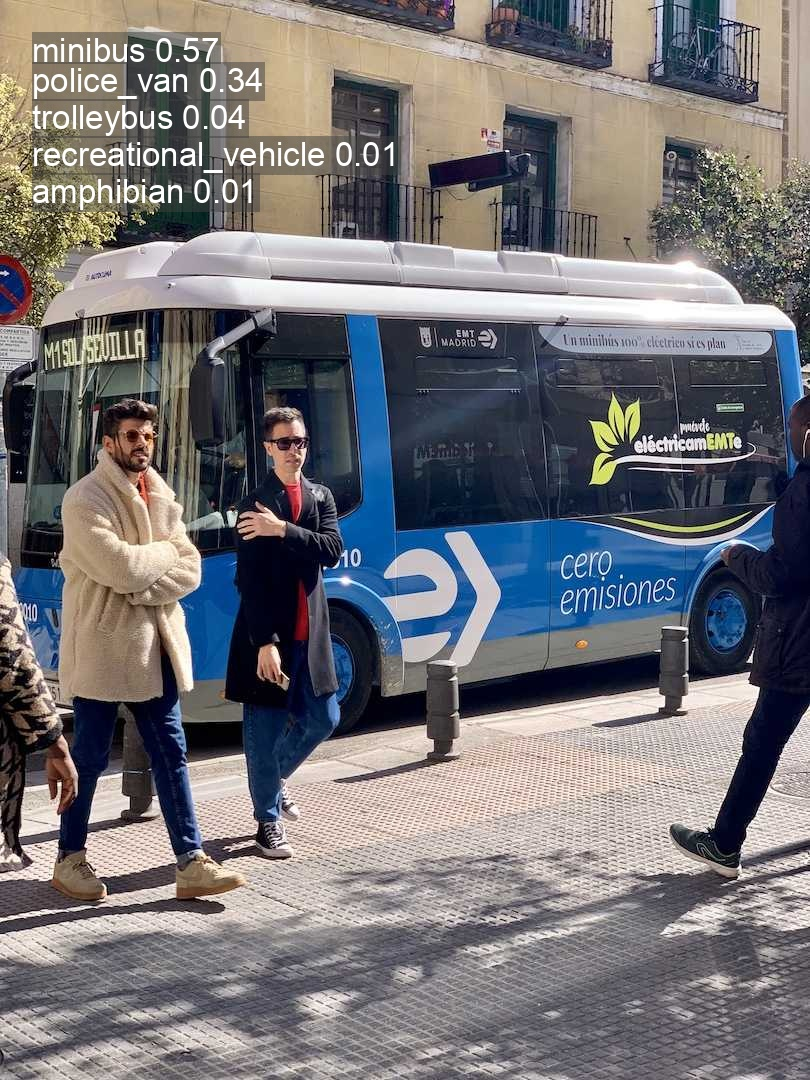

In [29]:
img = Image.open("runs/classify/predict4/bus.jpg")
scale=0.15
display(img.resize((int(img.size[0]*scale), int(img.size[1]*scale))))

### 2.3 Metrics Discussion

- **Confidence Score**:
  - The model outputs a confidence value that indicates how certain it is about its prediction.
  - Example: A confidence score of 0.94 means 94% certainty.

**Note:**
  - In CLIP, both the input image and labels are required to run the inference.
  - In this YOLO implementation, only the image is required as input is needed. 
  - The input text is the 1000 classes of Imagenet. Complete list can be found in this [ImageNet-1k dataset](https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/ImageNet.yaml).
  - Sample classes are:

  ``` bash
      names:
        0: tench
        1: goldfish
        2: great white shark
        3: tiger shark
        4: hammerhead shark
        ...
        654: minibus
        ...
        997: bolete
        998: ear
        999: toilet paper

  ```

Thus, in this prediction, the model infers that the input image 'bus.jpg' is a **'minibus'** with **57% confidence score** across 1000 classes.


### 2.4 Practical Applications

- **Product Recognition**:  
  Identifying products in e-commerce images for cataloging and recommendations.

- **Disease Diagnosis from X-rays**:  
  Classifying medical images to detect conditions like pneumonia, fractures, or cancer.


---


## 3. Object Detection

### 3.1 What is Object Detection?

- **Definition**: Object detection identifies and locates multiple objects within an image by drawing bounding boxes around them.

- **Goal**: Detect **what** objects are present and **where** they are located.

### 3.2 Code: Performing Object Detection with YOLO

Let's load a YOLO detection model and perform detection on an image.



In [30]:
from ultralytics import YOLO
import torch 

# Load a model
model = YOLO("yolo11n.pt")  # load an official model
# Note: Models download automatically from the latest Ultralytics release on first use.
# Classificaiton model is in the format 'yolo11<size>.pt', 
#       where size can be n (nano), s (small), m (medium), l (large), x (extra large)
# The bigger the model size, the better its metric performance (higher mAP), but slower, more memory needed (# of parameters), and more FLOPS (# of operations per sec)
# model = YOLO("yolo11s.pt")  # load an official model
# model = YOLO("yolo11m.pt")  # load an official model
# model = YOLO("yolo11l.pt")  # load an official model
# model = YOLO("yolo11x.pt")  # load an official model
# model = YOLO("path/to/best.pt")  # load a custom model

# Move model to GPU if available for faster processing
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)  

# Predict with the model
img="images/boy_dog.jpg"
results = model(img, save=True)  # predict on an image

# # Access the results
# for result in results:
#     xywh = result.boxes.xywh  # center-x, center-y, width, height
#     xywhn = result.boxes.xywhn  # normalized
#     xyxy = result.boxes.xyxy  # top-left-x, top-left-y, bottom-right-x, bottom-right-y
#     xyxyn = result.boxes.xyxyn  # normalized
#     names = [result.names[cls.item()] for cls in result.boxes.cls.int()]  # class name of each box
#     confs = result.boxes.conf  # confidence score of each box




image 1/1 /home/nikko/Documents/yolo/images/boy_dog.jpg: 544x640 1 person, 1 dog, 197.6ms
Speed: 8.3ms preprocess, 197.6ms inference, 2.7ms postprocess per image at shape (1, 3, 544, 640)
Results saved to runs/detect/predict3


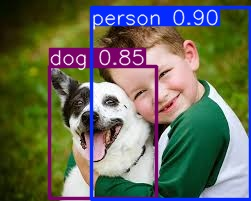

In [31]:
img = Image.open("runs/detect/predict3/boy_dog.jpg")
display(img)

### 3.3 Metrics Discussion

- **Confidence Score**:
  - Indicates the model's certainty for each detected object.

- **IoU (Intersection over Union)** (not shown in the image above):  
  Measures overlap between predicted bounding box and ground truth bounding box.

- **Average Precision (AP)** (not shown in the image above):
  - Measures how well the model detects each object class.
  - It considers both **precision** (correctness of predictions) and **recall** (coverage of all possible objects).

- **Mean Average Precision (mAP)** (not shown in the image above):
  - The average AP across all classes.
  - A common metric for evaluating object detection models.

Note: We'll focus on CV Tasks in this article. A separate article will be published  for IoU, AP, and mAP computations. 


### 3.4 Practical Applications

- **Autonomous Vehicles**:  
  Detecting pedestrians, other vehicles, traffic signs, and obstacles.

- **Surveillance Systems**:  
  Monitoring and detecting unusual activities or intrusions.

- **Retail Analytics**:  
  Counting people, tracking product movements, or analyzing shopper behavior.

---

## 3. Image Segmentation

### 3.1 What is Image Segmentation?

- **Definition**: Image segmentation is the task of partitioning an image into multiple meaningful parts.
- Instead of just bounding boxes, segmentation outlines the exact shape of objects.
- Two main types:
  - **Semantic Segmentation**: Label every pixel according to class (no distinction between objects of same class).
  - **Instance Segmentation**: Label each individual object separately.


### 3.2 Code: Performing Segmentation with YOLO





In [32]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-seg.pt")  # load an official model
# Note: Models download automatically from the latest Ultralytics release on first use.
# Classificaiton model is in the format 'yolo11<size>-seg.pt', 
#       where size can be n (nano), s (small), m (medium), l (large), x (extra large)
# The bigger the model size, the better its metric performance (higher mAP), but slower, more memory needed (# of parameters), and more FLOPS (# of operations per sec)
# model = YOLO("yolo11s-seg.pt")  # load an official model
# model = YOLO("yolo11m-seg.pt")  # load an official model
# model = YOLO("yolo11l-seg.pt")  # load an official model
# model = YOLO("yolo11x-seg.pt")  # load an official model
# model = YOLO("path/to/best.pt")  # load a custom model


device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device) 


# Predict with the model
img="images/camel.jpg"
results = model(img, save=True, show_boxes=False)  # predict on an image

# # Access the results
# for result in results:
#     xy = result.masks.xy  # mask in polygon format
#     xyn = result.masks.xyn  # normalized
#     masks = result.masks.data  # mask in matrix format (num_objects x H x W)


image 1/1 /home/nikko/Documents/yolo/images/camel.jpg: 640x480 2 persons, 1 horse, 41.4ms
Speed: 17.2ms preprocess, 41.4ms inference, 7.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict9


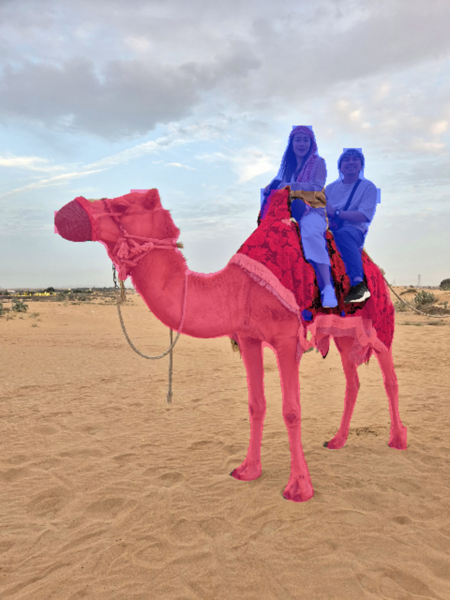

In [39]:
img = Image.open("runs/segment/predict9/camel.jpg")
scale=0.15
display(img.resize((int(img.size[0]*scale), int(img.size[1]*scale))))

## 3.3 Metrics Discussion

- **Confidence Score**:  
  Same idea as in detection — confidence that the segmented object is correct.
  
- **IoU (Intersection over Union)**:  
  Measures overlap between predicted mask and ground truth mask.

- **mAP for Segmentation**:  
  Just like in detection, but calculated on mask IoUs.


## 3.4 Practical Applications

- **Medical imaging** (e.g., tumor segmentation in MRI scans)
- **Autonomous driving** (e.g., road and lane detection)
- **Agriculture** (e.g., crop and weed segmentation)
- **Robotics** (e.g., precise object manipulation)

---


## 4. Pose Estimation

### 4.1 What is Pose Estimation?

- **Definition**:  
  Pose estimation predicts the locations of key points (like joints) on an object or person.
- For example, identifying where the head, shoulders, elbows, and knees are in an image.
- Instead of detecting whole objects, it focuses on the structure or "pose" of the object.


### 4.2 Code: Performing Pose Estimation with YOLO



In [24]:
from ultralytics import YOLO
import torch

# Load a model
# model = YOLO("yolo11n-pose.pt")  # load an official model
# model = YOLO("yolo11s-pose.pt")  # load an official model
# model = YOLO("yolo11m-pose.pt")  # load an official model
# model = YOLO("yolo11l-pose.pt")  # load an official model
model = YOLO("yolo11x-pose.pt")  # load an official model
# model = YOLO("path/to/best.pt")  # load a custom model

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device) 

inp = "images/jumpshot.jpg"

# Predict with the model
results = model(inp, save=True, show_labels=False, show_boxes=False)  # predict on an image




image 1/1 /home/nikko/Documents/yolo/images/jumpshot.jpg: 640x480 7 persons, 38.0ms
Speed: 1.9ms preprocess, 38.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/pose/predict5


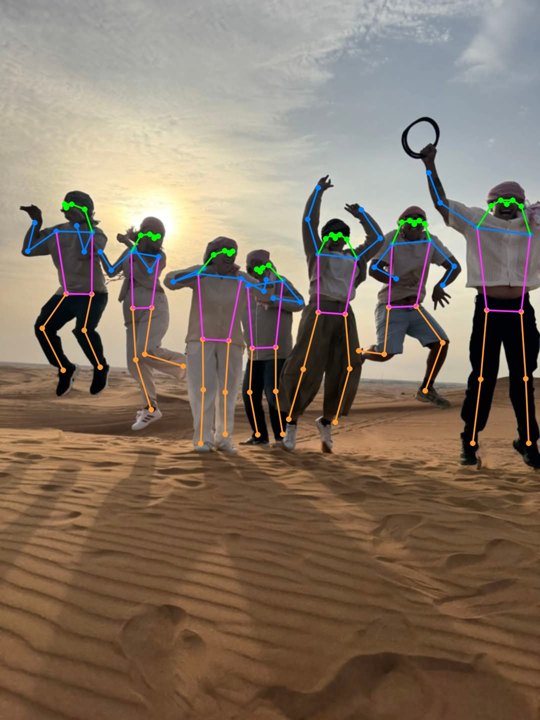

In [42]:
img = Image.open("runs/pose/predict5/jumpshot.jpg")
scale=0.5
display(img.resize((int(img.size[0]*scale), int(img.size[1]*scale))))

### 4.3 Metrics

- **Confidence Score**:  
  Each keypoint prediction has a confidence value.
  
- **PCK (Percentage of Correct Keypoints)**:  
  Measures how close the predicted keypoints are to the ground truth within a certain threshold.

- **AP for Keypoints**:  
  Mean Average Precision calculated based on keypoint detection.

### 4.4 Practical Applications

- **Human activity recognition** (e.g., sports analysis, fitness tracking)
- **Animation and motion capture** (e.g., movies, games)
- **Healthcare** (e.g., monitoring patient rehabilitation)
- **Human-robot interaction**

---

## 5. Oriented Bounding Box (OBB) Detection

### 5.1 What is OBB Detection?

- **Definition**:  
  Oriented Bounding Box (OBB) detection predicts boxes that are rotated to better fit the object's orientation.
- Unlike standard bounding boxes (which are always horizontal), OBBs can be angled.
- Useful for objects that are not perfectly aligned with the horizontal or vertical axis (e.g., ships, aerial images, text in documents).

### 5.2 Code: Performing OBB Detection with YOLO



In [46]:
from ultralytics import YOLO

# Load a model
# model = YOLO("yolo11n-obb.pt")  # load an official model
# model = YOLO("yolo11s-obb.pt")  # load an official model
# model = YOLO("yolo11m-obb.pt")  # load an official model
# model = YOLO("yolo11l-obb.pt")  # load an official model
model = YOLO("yolo11x-obb.pt")  # load an official model
# model = YOLO("path/to/best.pt")  # load a custom model

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device) 


results = model("https://ultralytics.com/images/boats.jpg", save=True, show_labels=False, line_width=3)  # predict on an image

# Predict with the model


Found https://ultralytics.com/images/boats.jpg locally at boats.jpg
image 1/1 /home/nikko/Documents/yolo/boats.jpg: 576x1024 49.9ms
Speed: 2.2ms preprocess, 49.9ms inference, 3.0ms postprocess per image at shape (1, 3, 576, 1024)
Results saved to runs/obb/predict9


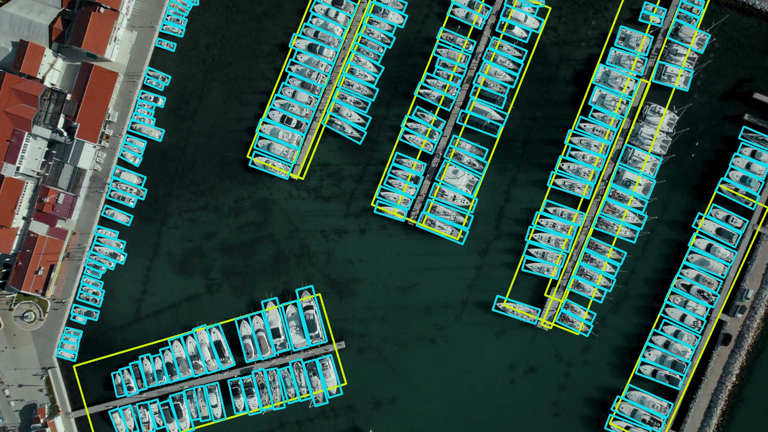

In [49]:
img = Image.open("runs/obb/predict9/boats.jpg")
scale=0.4
display(img.resize((int(img.size[0]*scale), int(img.size[1]*scale))))

### 5.4 Metrics

- **Confidence Score**:  
  Same as in object detection; how confident the model is that the box contains the correct object.
  
- **AP for OBBs**:  
  Similar to standard object detection AP, but the Intersection over Union (IoU) is calculated for rotated boxes.

- **mAP**:  
  Mean of AP over all classes.


### 5.5 Practical Applications

- **Aerial and satellite imagery** (e.g., detecting ships, buildings, vehicles)
- **Document analysis** (e.g., detecting rotated text or tables)
- **Industrial inspection** (e.g., inspecting rotated parts on conveyor belts)
- **Autonomous navigation** (e.g., drones recognizing rotated landmarks)

---

